![](ghtop_images/toyota_corolla_hybrid.jpeg)

You decided to buy a brand new car, and you are really excited, afterall it is such a big thing to own a car here (%200 tax). But is it really gonna worth it ?
If you decide to buy one, would it be a reliable, strong on the second hand and make you happy ?

These are some questions bugging my head when I decided to buy my first brand new car.  I already decided the car, it was Toyota Corolla Hybrid, it was looking reliable, fuel efficient and good size for trunk. Also it is exciting to try new tech so being hybrid was also influencing. It was the [third most selling car](https://www.arabam.com/blog/genel/2022-yili-turkiyede-en-cok-satilan-arabalar/) so it should be rather easy to sell it if I wanted to. As most people do, I’ve went and checked eksisozluk which would have an opinon as most of the things. Bu there were various ideas, some liked some not and decided to check for keywords about chronic problems etc.
There were some listed and you can find it when you Google, but I was wondering if I could find users opion in summary.


So I decided to crawl some of the most used web sites for product reviews and complains.

I aimed to answer these three questions:

1.	Can I find a useful information among those opions so that data can help me on my decision process?
2.	Can I build something generic out of it so I can use for other products or maybe for other products also.
3.	Can I find additional chronic problems or issues other than blogposts or googled answers?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist

import gensim.corpora as corpora
import gensim
from pprint import pprint
from pyLDAvis import gensim_models
import pickle 
import pyLDAvis
import os

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# 1.	Data

I've created crawler for the eksisozluk.com and used a quick way to crawl complains from sikayetvar.com
Toyota Corolla Hybrid has 236 comments on eksisozluk.com and 60 complaints on sikayetvar.com

In [15]:
eksi_toyota.head()

,comment,date,date_modified,author,source,comments_cleaned,comment_length,word_count,sentiment,sentiment_rounded,comment_lenght_binned,comment_en
0,türkiyede üretilecek otomobildir. kaynak,16.11.2018 23:45,NaN,sabir,toyota-corolla-hybrid,car produce turkey source,25,4,0.000000,0.0,"(-0.001, 62.0]",It is a car to be produced in Turkey. source
1,bugün lansmanı yapılan araç. fiyat konusunda a...,13.02.2019 20:33,NaN,ayvadana,toyota-corolla-hybrid,launch today think crazy price,30,5,-0.600000,-0.6,"(-0.001, 62.0]",vehicle launched today. I think they will go c...
2,toyota nın gösterip elletmediği yeni modelidir...,13.02.2019 22:14,NaN,thepcman,toyota-corolla-hybrid,new model show disclose obvious feature worldw...,98,14,0.045455,0.0,"(62.0, 125.0]",It is a new model that Toyota has shown or not...
3,"""lansmana özel"" fiyatları açıklanmış modeldirh...",14.02.2019 10:08,10:09,aydgn,toyota-corolla-hybrid,model launch special price announce vision ecv...,163,29,0.357143,0.4,"(125.0, 267.0]","Model with ""launch special"" prices announcedhy..."
4,hadi suv'yi falan 1.8 motor getiriyorsun hybri...,14.02.2019 10:22,10:22,sycrone one,toyota-corolla-hybrid,come bring suv engine buyer different mean bri...,271,44,-0.209881,-0.2,"(267.0, 3470.0]","Come on, you bring a SUV or something with a 1..."


In [31]:
sikayetvar_toyota.head()

,comment,source,comment_en,comment_cleaned,comment_length,word_count,sentiment,sentiment_rounded,comment_lenght_binned
0,Maalesef Toyota Efe Plazaya her gittiğimde ne...,https://www.sikayetvar.com,"Unfortunately, every time I go to Toyota Efe P...",unfortunately time efe plaza ask sin commit bu...,658,110,-0.129167,-0.1,"(501.0, 681.5]"
1,5 yıldır Toyota CHR Hybrid araç sahibiyim ve ...,https://www.sikayetvar.com,I have owned a Toyota CHR Hybrid vehicle for 5...,own chr 5 year happy launch cross user learn s...,240,40,0.223810,0.2,"(112.999, 251.25]"
2,Toyota Corolla Cross hibrit satın almak istiy...,https://www.sikayetvar.com,"I want to buy Toyota Corolla Cross hybrid, the...",want buy cross lot advertising sales mislead c...,125,17,0.011111,0.0,"(112.999, 251.25]"
3,Toyota Corolla hibrit aracım isletmesi fabrik...,https://www.sikayetvar.com,A screw was stuck in the tire of my Toyota Cor...,screw stick tire factoryoperated 11 08 2022 17...,531,86,0.037216,0.0,"(501.0, 681.5]"
4,2019 model Hybrid Corolla aracımın ön göğüste...,https://www.sikayetvar.com,My 2019 model Hybrid Corolla vehicle had scrat...,2019 model scratch discoloration dashboard kno...,255,39,-0.049660,-0.0,"(251.25, 501.0]"


## 1.1 Cleaning

The raw data was bit dirty so I had to remove \n, \r and some special characters before working on it.
Translated all comments from Turkish to English using Google Cloud Translate API.

## 1.2 Transformation

After cleaning, removed specific keywords like, toyota, vehicle and lemmatized words.

## 1.3 Features

Computed comment_length, word_count for each comment. Then used Textblob to predict the sentiment of each comment.

## 1.4 Analysis

array([[<AxesSubplot:title={'center':'comment_length'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'sentiment'}>, <AxesSubplot:>]],
      dtype=object)

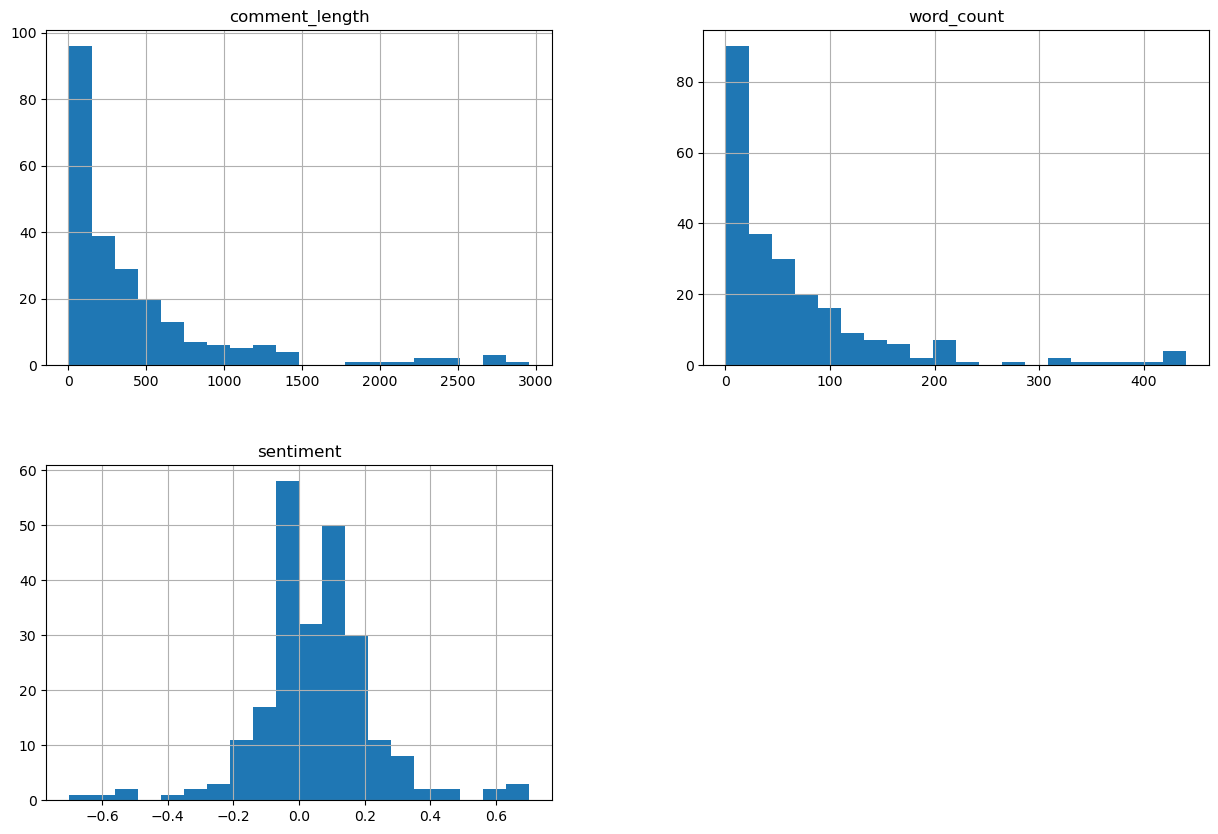

In [16]:
eksi_toyota[["comment_length", "word_count", "sentiment"]].hist(bins=20, figsize=(15, 10))

Since eksisozluk.com is a place where people can write good and bad experiences, we can see the balance from the sentiment distribution. Most of the comments are short.

array([[<AxesSubplot:title={'center':'comment_length'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'sentiment'}>, <AxesSubplot:>]],
      dtype=object)

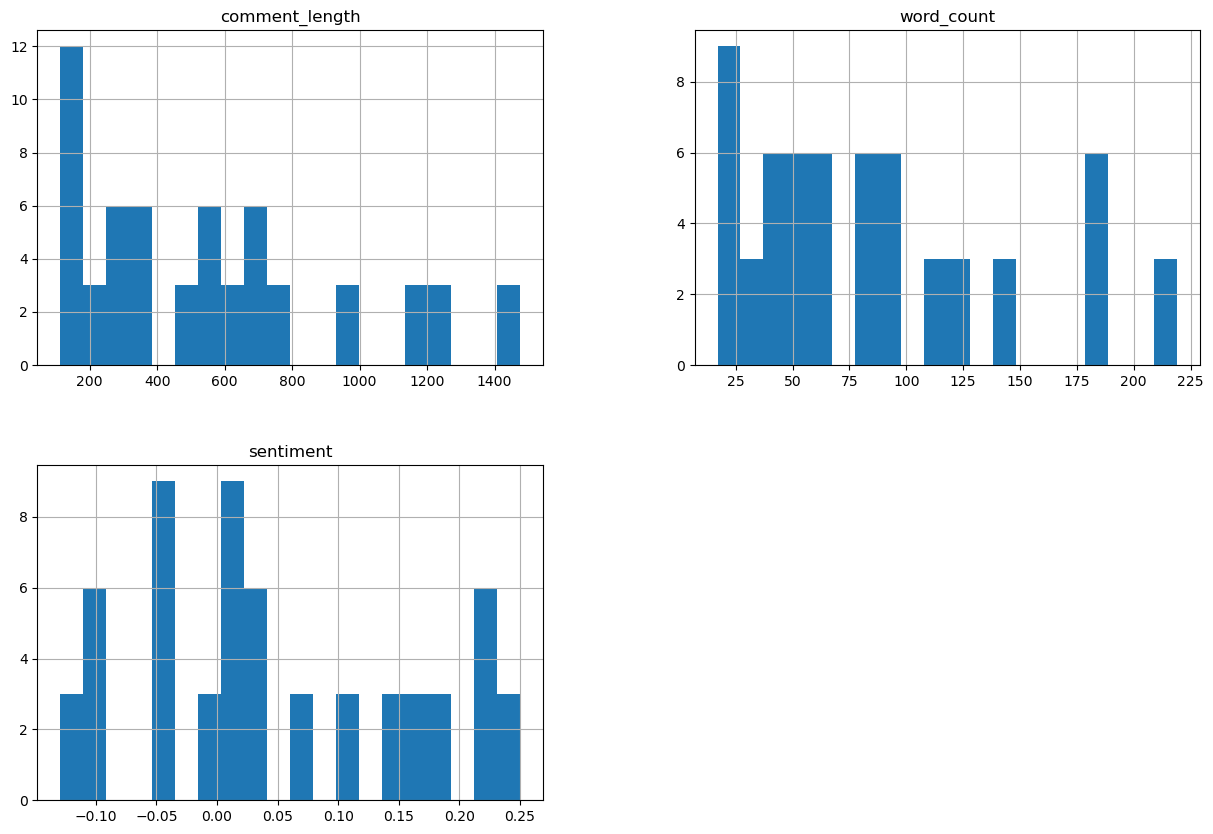

In [32]:
sikayetvar_toyota[["comment_length", "word_count", "sentiment"]].hist(bins=20, figsize=(15, 10))

On the other hand, people often visit sikayetvar.com when they experience some issue, so we can see that complaints length and sentiment are diverse.

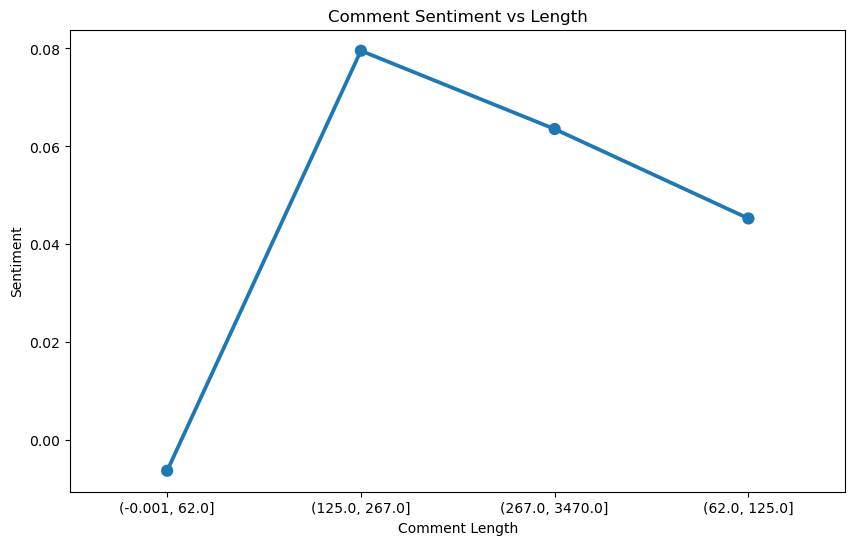

In [34]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "comment_lenght_binned", y = "sentiment_rounded",
              data = eksi_toyota.groupby('comment_lenght_binned').sentiment_rounded.mean().reset_index())
plt.ylabel("Sentiment")
plt.xlabel("Comment Length")
plt.title("Comment Sentiment vs Length")
plt.show()

On eksisozluk.com, people tend to write longer comments if they like the car.

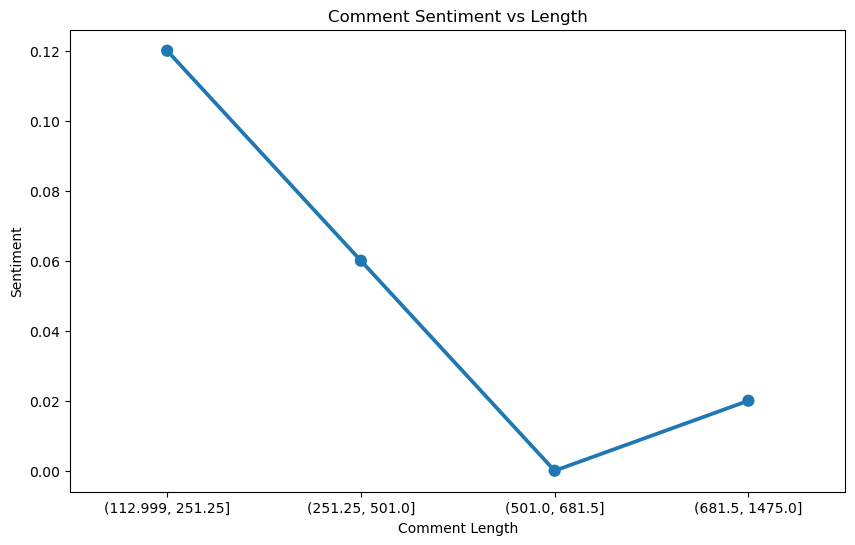

In [35]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "comment_lenght_binned", y = "sentiment_rounded",
              data = sikayetvar_toyota.groupby('comment_lenght_binned').sentiment_rounded.mean().reset_index())
plt.ylabel("Sentiment")
plt.xlabel("Comment Length")
plt.title("Comment Sentiment vs Length")
plt.show()

On the other hand, on sikayetvar.com if users are frustrated or negative it looks like they write longer.

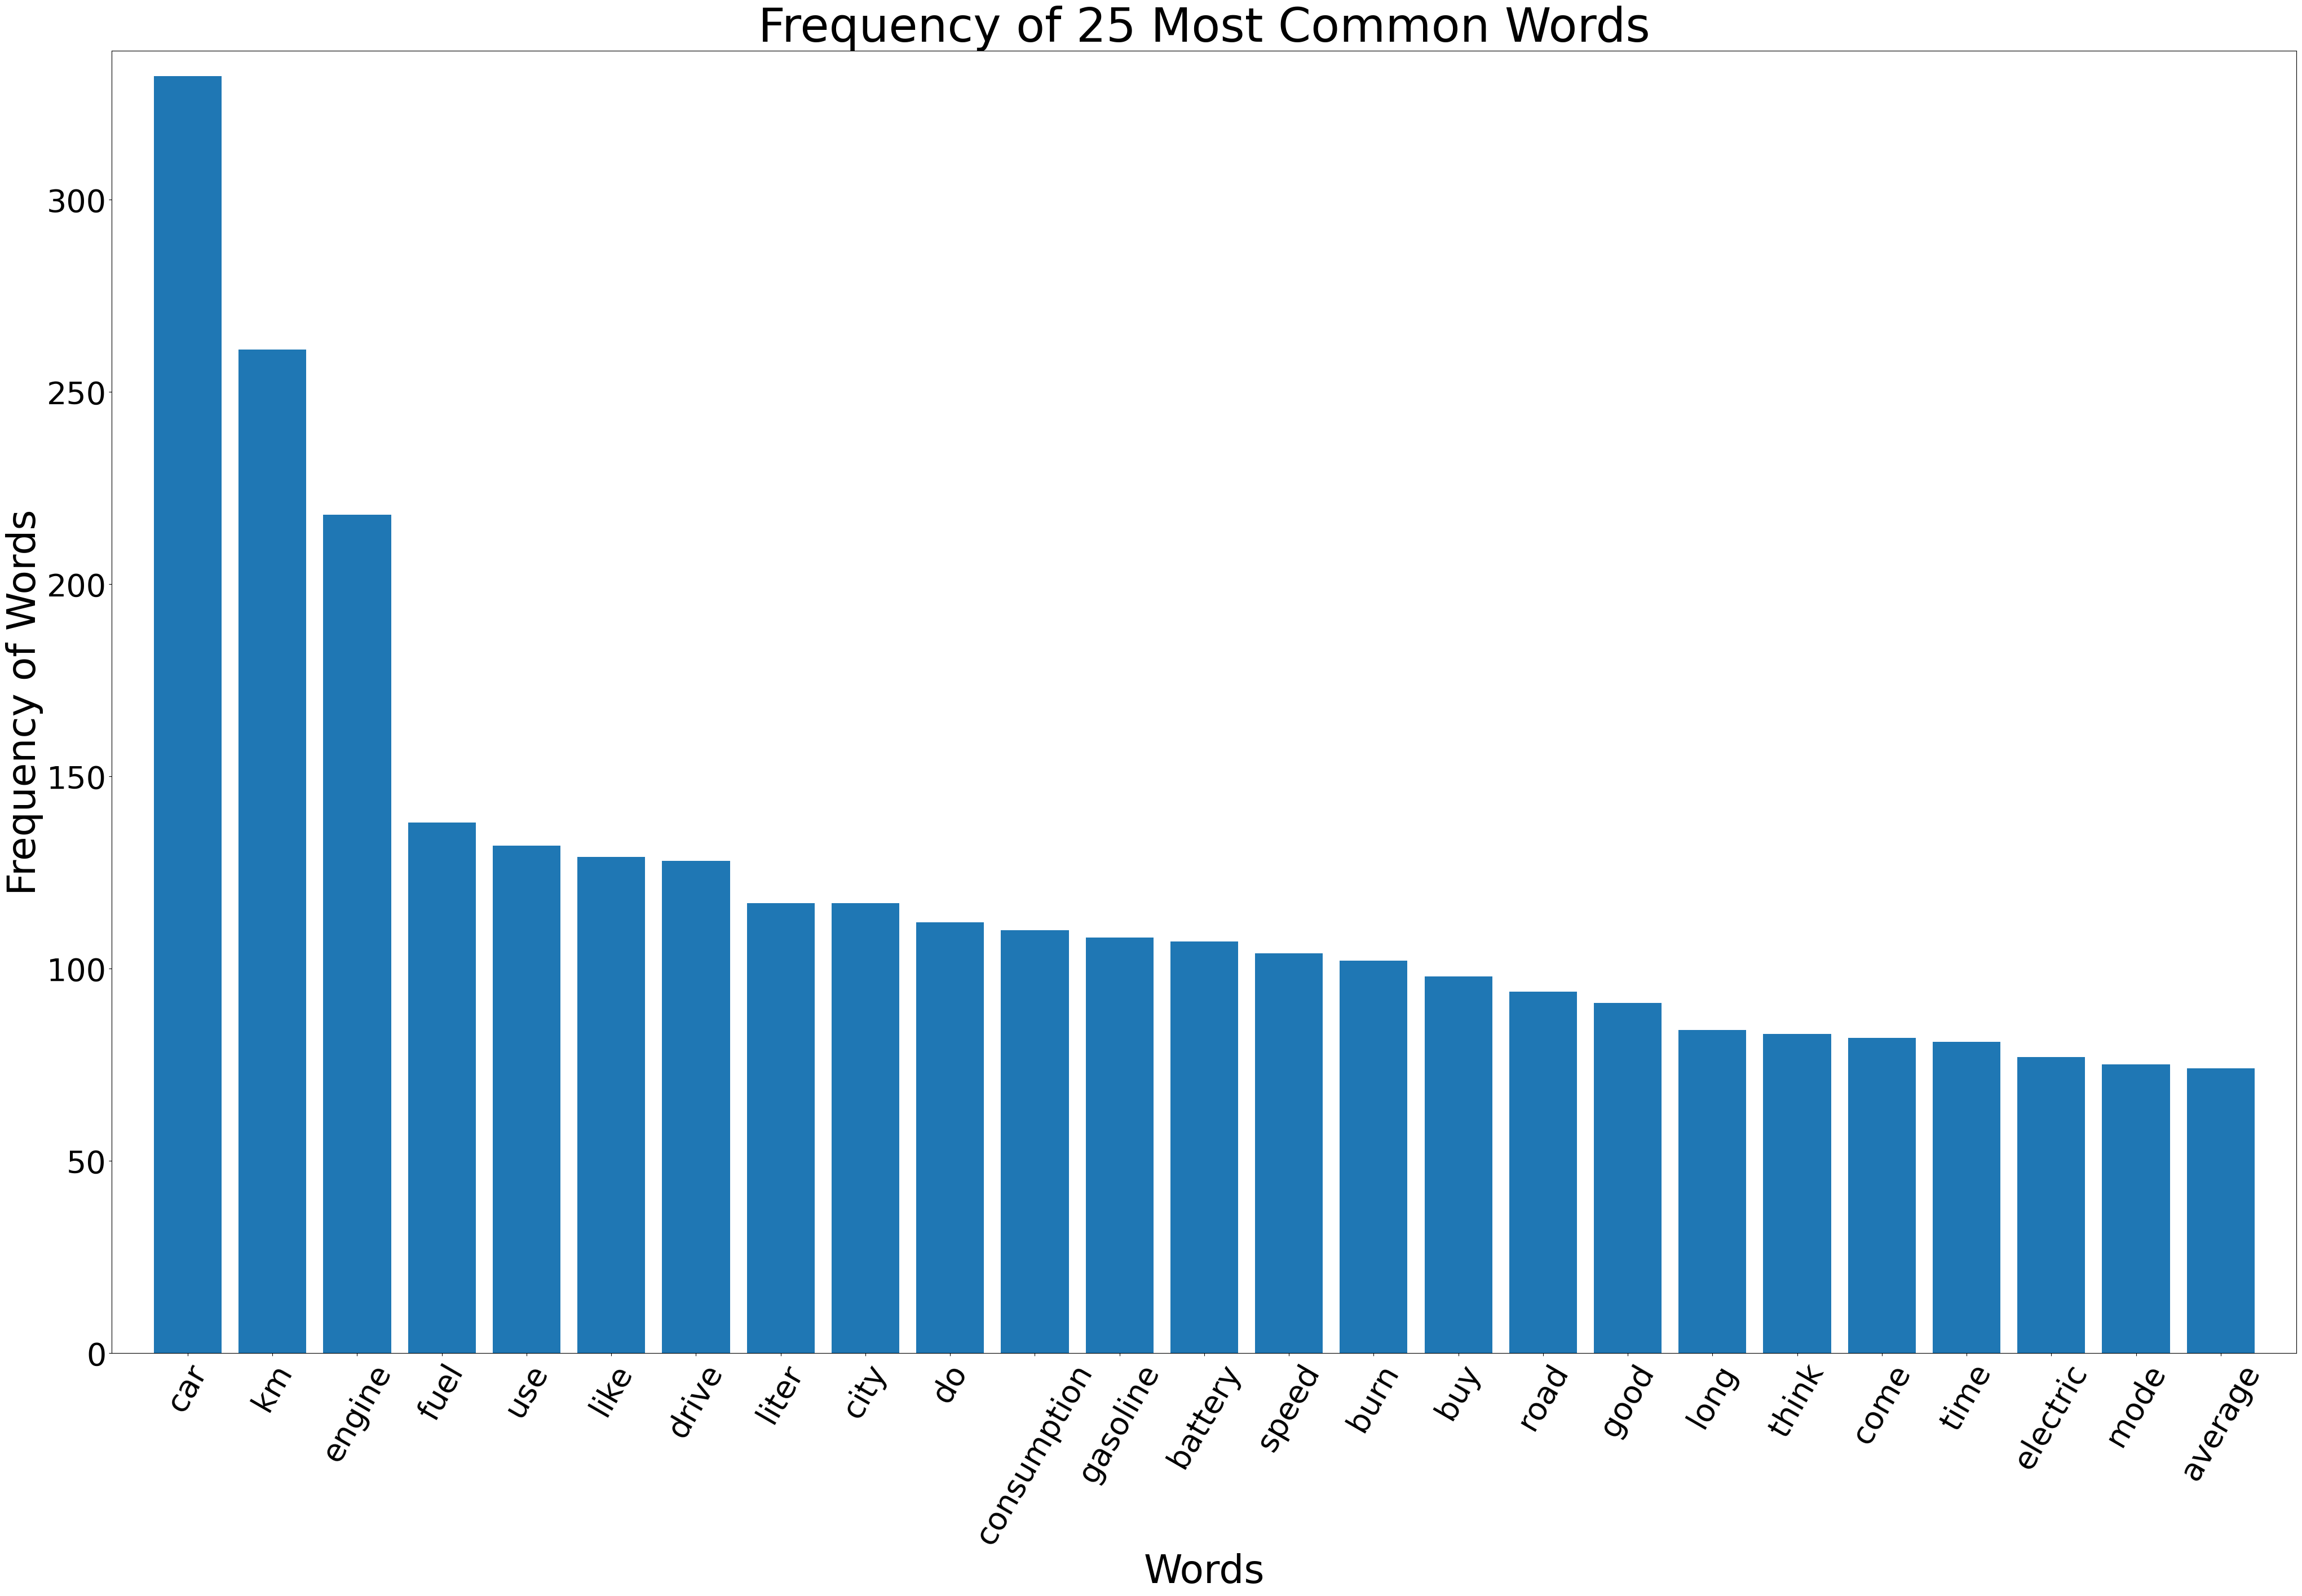

In [37]:
word_list_eksi = list()
for sentence in eksi_toyota.comments_cleaned.tolist():
  word_list_eksi.extend(sentence.split())

mostcommon_words = FreqDist(word_list_eksi).most_common(25)

x, y = zip(*mostcommon_words)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

on eksisozluk.com, people are mostly talking about cars consumption and speed.

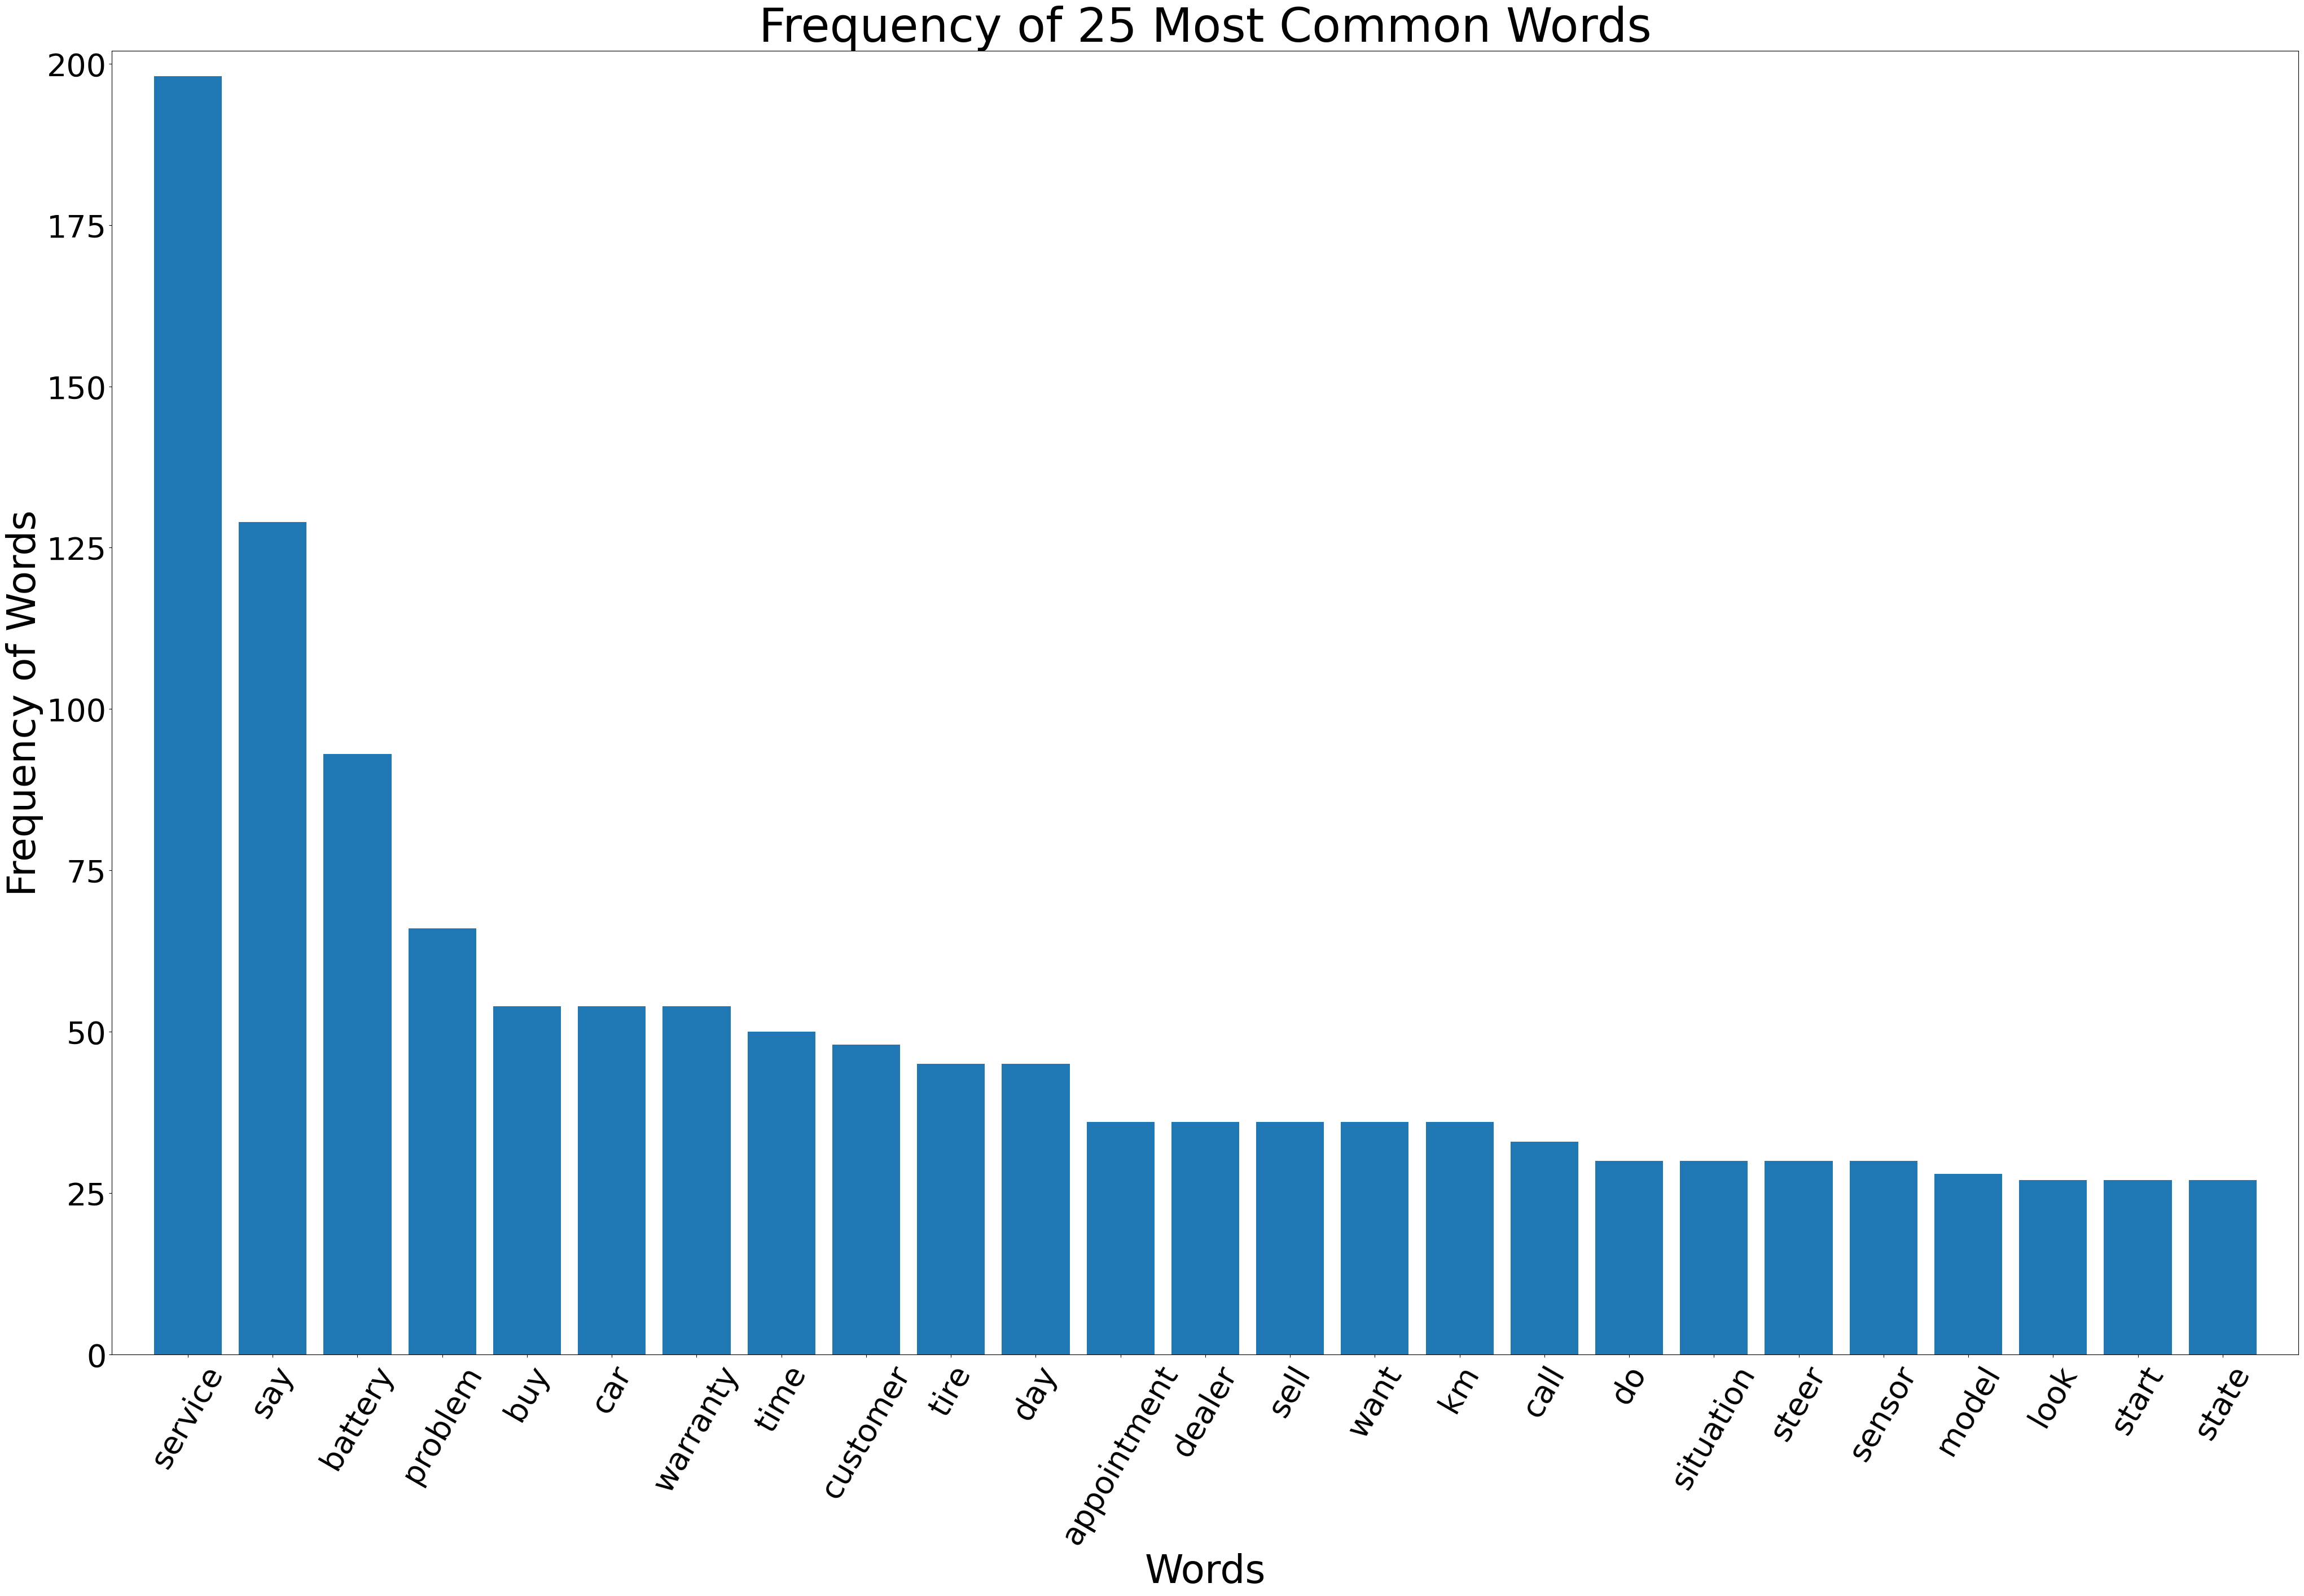

In [40]:
word_list_sikayet = list()
for sentence in sikayetvar_toyota.comment_cleaned.tolist():
  word_list_sikayet.extend(sentence.split())
mostcommon_words = FreqDist(word_list_sikayet).most_common(25)

x, y = zip(*mostcommon_words)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

on sikayetvar.com, it seems like people complains more about service and warranty issues.

# 2. Topic Modeling

Lets see if we can divide those comments and complaints to 3 main topics.

In [43]:
data_words_eksi = eksi_toyota.comments_cleaned.apply(lambda x: x.split()).tolist()
data_words_sikayet = sikayetvar_toyota.comment_cleaned.apply(lambda x: x.split()).tolist()

## 2.1 Eksisozluk Comments

In [56]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_eksi)
# Create Corpus
texts = data_words_eksi
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 3
# LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Check keywords in 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"km" + 0.019*"car" + 0.013*"engine" + 0.009*"liter" + 0.009*"fuel" + '
  '0.009*"speed" + 0.008*"use" + 0.007*"drive" + 0.007*"consumption" + '
  '0.007*"do"'),
 (1,
  '0.016*"car" + 0.011*"engine" + 0.010*"km" + 0.009*"like" + 0.007*"drive" + '
  '0.007*"electric" + 0.007*"use" + 0.006*"road" + 0.006*"gasoline" + '
  '0.006*"fuel"'),
 (2,
  '0.023*"car" + 0.013*"engine" + 0.009*"km" + 0.009*"city" + 0.009*"fuel" + '
  '0.008*"use" + 0.008*"battery" + 0.008*"drive" + 0.008*"like" + '
  '0.007*"consumption"')]


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')


![](ghtop_images/lda_eksi.png)

Here we can see on eksisozluk.com topics are:

1. Cars consumption efficienty  
2. Cars speed
3. More or less similar as 1.

## 2.2 Sikayetvar Complaints

In [51]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_sikayet)
# Create Corpus
texts = data_words_eksi
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 3
# LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Check keywords in 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"car" + 0.033*"km" + 0.024*"engine" + 0.018*"fuel" + 0.017*"battery" '
  '+ 0.015*"consumption" + 0.014*"like" + 0.014*"think" + 0.014*"use" + '
  '0.013*"gasoline"'),
 (1,
  '0.038*"km" + 0.037*"car" + 0.021*"drive" + 0.021*"city" + 0.020*"liter" + '
  '0.020*"use" + 0.017*"fuel" + 0.016*"do" + 0.016*"engine" + 0.015*"burn"'),
 (2,
  '0.036*"engine" + 0.033*"car" + 0.019*"km" + 0.016*"speed" + 0.016*"like" + '
  '0.016*"battery" + 0.015*"electric" + 0.013*"buy" + 0.013*"fuel" + '
  '0.012*"drive"')]


These are the words and their weight on building the corresponding topics.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

![](ghtop_images/lda_sikayet.png)

Here we can see on sikayetvar.com topics are:

1. First topic is generally about engine.
2. Second one is about consumption.
3. Third one is similar to second but also about battery.

## 3. Conclusion

It seems like I found answers to first two of my questions on beginning, so it seems like people liked the car and there are complaints about service and warranty.
This approch can be transformed into a generic application so we can search for keywords and get a summary about products. However I could not find any chronic problem information on first glance. Maybe it can be derived with deeper analysis.